# **MNIST classification with keras model**

---
mount google drive

In [1]:
# to mount google drive into colab
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


set the workdir and import libraries

In [0]:
import os, sys

workdir_path = '/content/drive/My Drive/Python/ICA'
os.chdir(workdir_path)
sys.path.append(workdir_path)

In [3]:
import keras
from keras.datasets import mnist

# importing the Sequential model and the specific layers to be used
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

import matplotlib.pyplot as plt     # only to show the images at end
from numpy.random import randint    # only to generate a random nuymber ar end
from numpy import argmax

Using TensorFlow backend.


set the basic configurations, load the MNIST database and convert it to the necessary format

In [4]:
### configurations
batch_size = 100
num_classes = 10
epochs = 8

# input image dimensions
img_rows, img_cols = 28, 28

# split the data between train and test
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# reshape the database, the standard confioguration is ("image_data_format": "channels_last")
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)



11493376/11490434 [==============================] - 0s 0us/step


In [5]:
# convert to float32 and with range of (0-1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# show the shapes 
print('x_train shape:', x_train.shape)
print('x_test shape:', y_train.shape)
print('samples for train: ', x_train.shape[0])
print('samples for test: ', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
x_test shape: (60000,)
samples for train:  60000
samples for test:  10000


In [0]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


## Create, configure and train the model

In [7]:
# create the model
model = Sequential()

# model taken from keras documentation
# adding layers
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# last layer wiht outputs = number of classes
model.add(Dense(num_classes, activation='softmax'))






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [8]:
# Configure the model for training
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])



In [9]:
# train the model
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/8





60000/60000 [==============================] - 18s 305us/step - loss: 0.2422 - acc: 0.9265 - val_loss: 0.0572 - val_acc: 0.9812
Epoch 2/8
60000/60000 [==============================] - 10s 173us/step - loss: 0.0877 - acc: 0.9744 - val_loss: 0.0416 - val_acc: 0.9861
Epoch 3/8
60000/60000 [==============================] - 10s 172us/step - loss: 0.0626 - acc: 0.9815 - val_loss: 0.0344 - val_acc: 0.9883
Epoch 4/8
60000/60000 [==============================] - 10s 170us/step - loss: 0.0511 - acc: 0.9844 - val_loss: 0.0305 - val_acc: 0.9897
Epoch 5/8
60000/60000 [==============================] - 10s 170us/step - loss: 0.0448 - acc: 0.9866 - val_loss: 0.0263 - val_acc: 0.9905
Epoch 6/8
60000/60000 [==============================] - 10s 171us/step - loss: 0.0392 - acc: 0.9880 - val_loss: 0.0289 - val_acc: 0.9903
Epoch 7/8
60000/6000

Metrics

In [10]:
# show the loss and accuracy 
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.02517017969938497
Test accuracy: 0.9915


Predictions 

prediction:  7
real value:  7


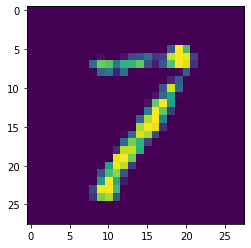

In [11]:
i=randint(1, x_test.shape[0])
plt.imshow(x_test[i].reshape((28,28)))
print("prediction: ", model.predict_classes(x_test[i].reshape((1,28,28,1)))[0])
print("real value: ", argmax(y_test[i]))